In [2]:
%pip install fastbook


  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached argon2_cffi_bindings-21.2.0-cp38-abi3-macosx_10_9_universal2.whl.metadata (6.7 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
     

#hide
from fastbook import *
     

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
%pip install ipykernel jupyter-core tornado traitlets


Note: you may need to restart the kernel to use updated packages.


In [7]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [9]:
#hide
Path.BASE_PATH = path

In [10]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [11]:
(path/"images").ls()


(#7393) [Path('images/Egyptian_Mau_167.jpg'),Path('images/pug_52.jpg'),Path('images/basset_hound_112.jpg'),Path('images/Siamese_193.jpg'),Path('images/shiba_inu_122.jpg'),Path('images/Siamese_53.jpg'),Path('images/Birman_167.jpg'),Path('images/leonberger_6.jpg'),Path('images/Siamese_47.jpg'),Path('images/shiba_inu_136.jpg'),Path('images/saint_bernard_139.jpg'),Path('images/Birman_173.jpg'),Path('images/Abyssinian_225.jpg'),Path('images/basset_hound_106.jpg'),Path('images/miniature_pinscher_200.jpg'),Path('images/Siamese_187.jpg'),Path('images/wheaten_terrier_49.jpg'),Path('images/Egyptian_Mau_173.jpg'),Path('images/pug_46.jpg'),Path('images/shiba_inu_43.jpg')...]

In [12]:
fname = (path/"images").ls()[0]

In [13]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Egyptian_Mau']

In [17]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dls = pets.dataloaders(path/"images", device=device)


pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [18]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lingsiewwin/Documents/GitHub/Dog and Cat Breed/images/grizzly.jpg'

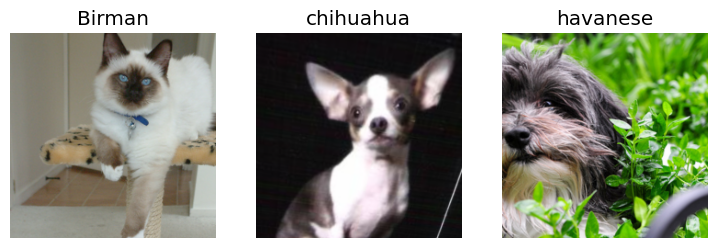

In [19]:
dls.show_batch(nrows=1, ncols=3)    

In [20]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/lingsiewwin/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /Users/lingsiewwin/.fastai/data/oxford-iiit-pet/images/saint_bernard_60.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'ad

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 500, 375])
	Item at index 1 has shape: torch.Size([3, 333, 500])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/lingsiewwin/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:08<00:00, 10.5MB/s]


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [22]:
x,y = dls.one_batch()


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
     

#hide
from fastbook import *
     

ModuleNotFoundError: No module named 'fastbook'

In [23]:
y


NameError: name 'y' is not defined

In [25]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

NameError: name 'x' is not defined

In [24]:
len(preds[0]),preds[0].sum()


NameError: name 'preds' is not defined

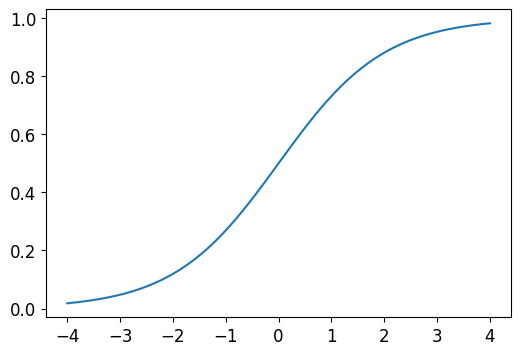

In [26]:
plot_function(torch.sigmoid, min=-4,max=4)


In [27]:
#hide
torch.random.manual_seed(42);


In [28]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [29]:
acts.sigmoid()


tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [30]:
(acts[:,0]-acts[:,1]).sigmoid()


tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [31]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)


In [32]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [33]:
targ = tensor([0,1,0,1,1,0])


In [34]:
sm_acts


tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [35]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
     

#hide
from fastbook import *
     

ModuleNotFoundError: No module named 'fastbook'

In [36]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('')[1]
html = re.sub(r'', r'', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [37]:
-sm_acts[idx, targ]


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [38]:
F.nll_loss(sm_acts, targ, reduction='none')


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

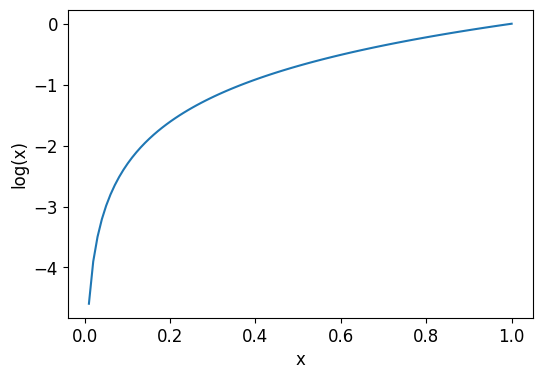

In [39]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')


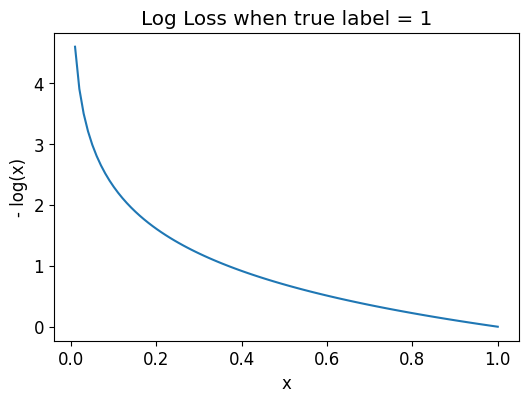

In [40]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')


In [41]:
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('')[1]
html = re.sub(r'', r'', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [42]:
loss_func = nn.CrossEntropyLoss()


In [43]:
loss_func(acts, targ)


tensor(1.8045)

In [44]:
F.cross_entropy(acts, targ)


tensor(1.8045)

In [45]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)


tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

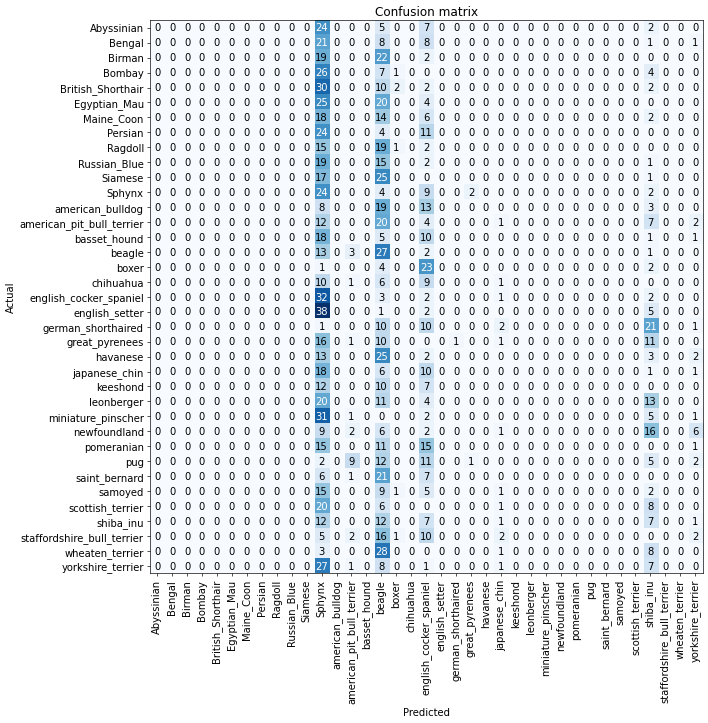

In [46]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [47]:
interp.most_confused(min_val=5)


[('english_setter', 'Sphynx', 38),
 ('english_cocker_spaniel', 'Sphynx', 32),
 ('miniature_pinscher', 'Sphynx', 31),
 ('British_Shorthair', 'Sphynx', 30),
 ('wheaten_terrier', 'beagle', 28),
 ('yorkshire_terrier', 'Sphynx', 27),
 ('Bombay', 'Sphynx', 26),
 ('Egyptian_Mau', 'Sphynx', 25),
 ('Siamese', 'beagle', 25),
 ('havanese', 'beagle', 25),
 ('Abyssinian', 'Sphynx', 24),
 ('Persian', 'Sphynx', 24),
 ('boxer', 'english_cocker_spaniel', 23),
 ('Birman', 'beagle', 22),
 ('Bengal', 'Sphynx', 21),
 ('german_shorthaired', 'shiba_inu', 21),
 ('saint_bernard', 'beagle', 21),
 ('Egyptian_Mau', 'beagle', 20),
 ('american_pit_bull_terrier', 'beagle', 20),
 ('leonberger', 'Sphynx', 20),
 ('scottish_terrier', 'Sphynx', 20),
 ('Birman', 'Sphynx', 19),
 ('Ragdoll', 'beagle', 19),
 ('Russian_Blue', 'Sphynx', 19),
 ('american_bulldog', 'beagle', 19),
 ('Maine_Coon', 'Sphynx', 18),
 ('basset_hound', 'Sphynx', 18),
 ('japanese_chin', 'Sphynx', 18),
 ('Siamese', 'Sphynx', 17),
 ('great_pyrenees', 'Sphy

In [48]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.536101,5.532467,0.568336,39:53


epoch,train_loss,valid_loss,error_rate,time
0,3.863998,2.393325,0.691475,3:58:26


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, 

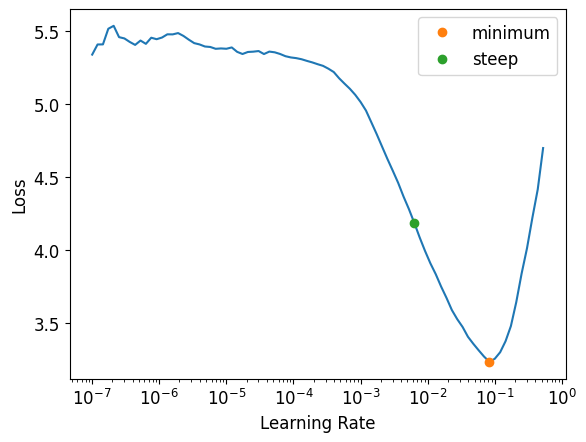

In [49]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [50]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")


Minimum/10: 8.32e-03, steepest point: 6.31e-03


In [51]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.297897,0.340765,0.106225,11:31


epoch,train_loss,valid_loss,error_rate,time
0,0.560693,0.334218,0.108931,14:26
1,0.327422,0.228024,0.078484,14:38


In [52]:
learn.fine_tune??


Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fastai/callback/schedule.py
Type:      method

In [53]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.135495,0.327470,0.098106,12:05
1,0.516585,0.279589,0.083897,11:33


In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find()


In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [ ]:
learn.recorder.plot_loss()
